In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')
plt.style.use("ggplot")

# Creating sample data
We create sample data with years (2010 - 2020), sales data and create another arrays where we can use our model on.

In [29]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

sales = [2000, 2250, 2800, 2850, 3542, 3707, 5556, 8544, 8555, 9100, 12000]

prediction = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030] 

years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

#### Currently all arrays are 1-dimensional Arrays, but Sklearn expects 2-d Arrays when building a model.

In [31]:
np_years = np.array(years).reshape(-1, 1)

np_sales = np.array(sales).reshape(-1, 1)

np_prediction = np.array(prediction).reshape(-1, 1)

years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Linear Regression

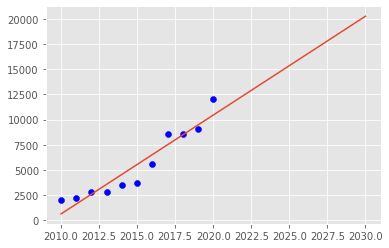

In [34]:
# plotting
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(np_years, np_sales)

plt.scatter(years, sales, color = "blue")
plt.plot(prediction, lr.predict(np_prediction));

In [40]:
# comparing predictions
for number in [2010, 2015, 2020, 2025, 2030]:
    val = lr.predict(np.array(number).reshape(-1, 1))[0]
    
    if number in years:
        real_val = sales[years.index(number)]
        
        print(f"Prediction for year {number}: {int(val)} - Real Value: {real_val}")
    else:
        print(f"Prediction for year {number}: {int(val)}")

Prediction for year 2010: 624 - Real Value: 2000
Prediction for year 2015: 5536 - Real Value: 3707
Prediction for year 2020: 10448 - Real Value: 12000
Prediction for year 2025: 15361
Prediction for year 2030: 20273
